Aim - Bagging Classifier
Danish Shaikh - 221P054 - 35


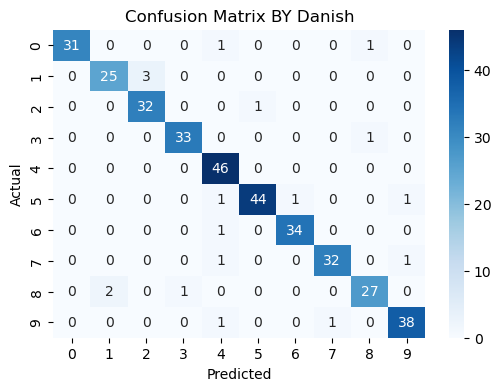

In [1]:
print("Aim - Bagging Classifier")
print("Danish Shaikh - 221P054 - 35")
import tkinter as tk
from tkinter import messagebox, ttk
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def train_model():
    try:
        # Load dataset
        digits = load_digits()
        X, y = digits.data, digits.target
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Choose base estimator
        if estimator_combo.get() == "Decision Tree":
            estimator = DecisionTreeClassifier(random_state=42)
        else:
            estimator = LogisticRegression(max_iter=500, solver="liblinear")

        # Bagging model
        model = BaggingClassifier(
            estimator=estimator,
            n_estimators=int(estimator_entry.get()),
            random_state=42
        )
        model.fit(X_train, y_train)

        # Accuracy
        accuracy = model.score(X_test, y_test)
        accuracy_label.config(text=f"Model Accuracy: {accuracy:.2f}")

        # Confusion matrix
        cm = confusion_matrix(y_test, model.predict(X_test))
        fig, ax = plt.subplots(figsize=(6, 4))
        sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_title("Confusion Matrix BY Danish")

        # Clear previous canvas
        for widget in canvas_frame.winfo_children():
            widget.destroy()

        # Embed confusion matrix in Tkinter
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
window = tk.Tk()
window.title("Bagging Classifier GUI - Danish Shaikh 221P054")
window.config(bg="#f0f0f0")

# Base estimator dropdown
ttk.Label(window, text="Select Base Estimator:").pack(pady=10)
estimator_combo = ttk.Combobox(window, values=["Decision Tree", "Logistic Regression"])
estimator_combo.current(0)
estimator_combo.pack(pady=10)

# Number of estimators
ttk.Label(window, text="Number of Estimators:").pack(pady=10)
estimator_entry = tk.Entry(window)
estimator_entry.insert(0, "10")
estimator_entry.pack(pady=10)

# Train button
tk.Button(window, text="Train Model", command=train_model, bg="#4CAF50", fg="white").pack(pady=15)

# Accuracy label
accuracy_label = tk.Label(window, text="Model Accuracy: N/A", bg="#f0f0f0")
accuracy_label.pack(pady=10)

# Frame for confusion matrix
canvas_frame = tk.Frame(window, bg="#f0f0f0")
canvas_frame.pack(pady=20)

# Run GUI
window.mainloop()


In [2]:
print("Aim - Bagging Regressor")
print("Danish Shaikh - 221P054 - 35")
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

def create_gui():
    def train_model():
        try:
            # Generate regression dataset
            X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Choose base model
            if model_choice.get() == "Decision Tree":
                base_model = DecisionTreeRegressor(random_state=42)
            else:
                base_model = LinearRegression()

            # Bagging Regressor
            bag_model = BaggingRegressor(
                estimator=base_model,
                n_estimators=int(n_estimators.get()),
                max_samples=float(samples.get()),
                bootstrap=bool(bootstrap_var.get()),
                random_state=42
            )

            # Grid Search
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_samples': [0.5, 0.7, 1.0]
            }
            grid = GridSearchCV(bag_model, param_grid, cv=5, n_jobs=-1)
            grid.fit(X_train, y_train)

            # Predictions
            y_pred = grid.best_estimator_.predict(X_test)

            # Metrics
            mse = mean_squared_error(y_test, y_pred)
            r2_train = grid.best_estimator_.score(X_train, y_train)
            r2_test = grid.best_estimator_.score(X_test, y_test)

            # Update results
            result_label.config(text=f"MSE: {mse:.4f}, Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")
            best_params_label.config(text=f"Best Params: {grid.best_params_}")

        except Exception as e:
            messagebox.showerror("Error", str(e))

    # Main window
    window = tk.Tk()
    window.title("Bagging Regressor - Danish Shaikh 221P054")

    # Model selection
    ttk.Label(window, text="Model:").pack(pady=5)
    model_choice = ttk.Combobox(window, values=["Decision Tree", "Linear Regression"])
    model_choice.current(0)
    model_choice.pack(pady=5)

    # Input fields
    for text, var in [("Estimators:", "100"), ("Samples (0-1):", "0.5")]:
        ttk.Label(window, text=text).pack(pady=5)
        entry = tk.Entry(window)
        entry.insert(0, var)
        entry.pack(pady=5)
        if text.startswith("Estimators"):
            n_estimators = entry
        else:
            samples = entry

    # Bootstrap checkbox
    bootstrap_var = tk.IntVar()
    tk.Checkbutton(window, text="Bootstrap", variable=bootstrap_var).pack(pady=5)

    # Train button
    tk.Button(window, text="Train Model", command=train_model, bg="#4CAF50", fg="white").pack(pady=10)

    # Result labels
    result_label = tk.Label(window, text="MSE: N/A")
    result_label.pack(pady=5)
    best_params_label = tk.Label(window, text="Best Params: N/A")
    best_params_label.pack(pady=5)

    # Run GUI
    window.mainloop()

# Run the app
create_gui()


Aim - Bagging Regressor
Danish Shaikh - 221P054 - 35


Aim - Random Forest Classifier
Danish Shaikh - 221P054 - 35


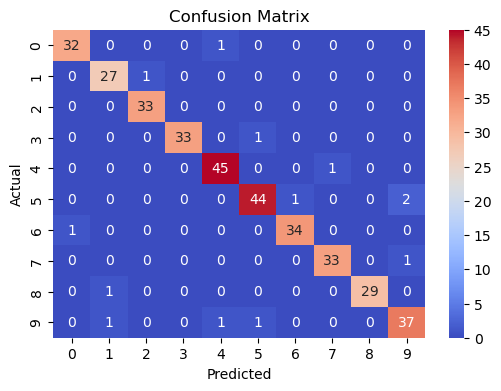

In [3]:
print("Aim - Random Forest Classifier")
print("Danish Shaikh - 221P054 - 35")
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def train_model():
    try:
        # Load dataset
        digits = load_digits()
        X_train, X_test, y_train, y_test = train_test_split(
            digits.data, digits.target, test_size=0.2, random_state=42
        )

        # Train Random Forest
        model = RandomForestClassifier(
            n_estimators=int(n_estimators_entry.get()), random_state=42
        )
        model.fit(X_train, y_train)

        # Accuracy
        accuracy = model.score(X_test, y_test)
        accuracy_lbl.config(text=f"Accuracy: {accuracy:.2f}")

        # Confusion matrix
        cm = confusion_matrix(y_test, model.predict(X_test))
        fig, ax = plt.subplots(figsize=(6, 4))
        sn.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", ax=ax)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_title("Confusion Matrix")

        # Clear previous canvas
        for widget in canvas_frame.winfo_children():
            widget.destroy()

        # Embed plot in Tkinter
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
app = tk.Tk()
app.title("Random Forest Classifier - Danish Shaikh 221P054")
app.config(bg="#f0f0f0")

# Input field
tk.Label(app, text="Number of Estimators:", bg="#f0f0f0").pack(pady=10)
n_estimators_entry = tk.Entry(app)
n_estimators_entry.insert(0, "20")
n_estimators_entry.pack(pady=5)

# Train button
train_btn = tk.Button(app, text="Train Model", command=train_model, bg="#4CAF50", fg="white")
train_btn.pack(pady=15)

# Accuracy label
accuracy_lbl = tk.Label(app, text="Accuracy: N/A", bg="#f0f0f0")
accuracy_lbl.pack(pady=10)

# Canvas frame for confusion matrix
canvas_frame = tk.Frame(app, bg="#f0f0f0")
canvas_frame.pack(pady=15)

# Run GUI
app.mainloop()

